Imports

In [16]:
import os


from PIL import Image
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split



## Data Exploration

Data is loaded from this paper: https://www.sciencedirect.com/science/article/pii/S2352340920309847

In [2]:
# Number of files in the data/shapes
image_files = list(Path('data/shapes').glob('*.png'))
print('Number of images found:', len(image_files))

# Print names of first five files
print("Example files")
print('\n'.join([str(x) for x in image_files[:5]]))

Number of images found: 90000
Example files
data/shapes/Nonagon_fb1f8b2e-2a8d-11ea-8123-8363a7ec19e6.png
data/shapes/Hexagon_95d6bf6e-2a95-11ea-8123-8363a7ec19e6.png
data/shapes/Square_037dc95e-2a91-11ea-8123-8363a7ec19e6.png
data/shapes/Triangle_2f39dc38-2a94-11ea-8123-8363a7ec19e6.png
data/shapes/Square_398778f2-2a9a-11ea-8123-8363a7ec19e6.png


It seems that the shape label is included the filename. We can also check this by visualizing the first shape in the data.

## Test image

Below is an example of what an image in the dataset looks like

Shape: Hexagon


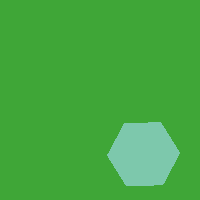

In [29]:

# Load the first image from data/shapes
first_img = image_files[1]

# Get the label from the filename
label = first_img.parts[-1].split("_")[0]

print(f"Shape: {label}")
image = Image.open(first_img)
image

The image seems to be a color image (with 3 channels). This can be confirmed by checking the shape of the array

In [4]:
np.array(image).shape

(200, 200, 3)

The images seem to be in a simple 200 x 200 shape. We dont need the colorscale for classifying simple images, so we could simply convert the images to grayscale. The interesting thing in terms of modeling is that the shapes come in different background colors, meaning that the "non-shape" area wont always be white by default. However, this shouldnt eventually prove to be any problem since the model should anyways catch the shape differences.

In [5]:

# # Convert the image to grayscale
image = image.convert('L')
image

np.array(image)

# # Resize the image to a specific size
# image = image.resize((224, 224))

# # Convert the image to a numpy array
# image_array = np.array(image)

# # Normalize the pixel values
# image_array = image_array / 255.0

# # Reshape the image array to match the input shape of the neural network
# image_array = np.reshape(image_array, (1, 224, 224, 1))


array([[123, 123, 123, ..., 123, 123, 123],
       [123, 123, 123, ..., 123, 123, 123],
       [123, 123, 123, ..., 123, 123, 123],
       ...,
       [123, 123, 123, ..., 123, 123, 123],
       [123, 123, 123, ..., 123, 123, 123],
       [123, 123, 123, ..., 123, 123, 123]], dtype=uint8)

## Preprocessing

Next we automate the similar processing for all of the images and save them for later training. We will also split the data into train and validation sets. We will also normalize the pixel values to be 0-1.

In [25]:

data_folder = "data/"
label_list = []
img_list = []

for file_name in tqdm(image_files[:1000]):
    # Get shape label
    label = str(file_name).split("_")[0]
    label_list.append(label)

    # Get image
    image = Image.open(first_img).convert('L')
    image = np.array(image) / 255.0
    img_list.append(image)

# print(label_list)


  0%|          | 0/1000 [00:00<?, ?it/s]

Finally, lets split the data and save them for later training.

In [21]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(img_list, label_list, test_size=0.2, random_state=42)

# Print the sizes of the train and test sets
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))


Train set size: 800
Test set size: 200


In [28]:
# Create folder data/processed with pathlib
processed_folder = Path("data") / "processed"
processed_folder.mkdir(parents=True, exist_ok=True)

# Save results to processed folder
np.save(processed_folder / 'X_train.npy', X_train)
np.save(processed_folder / 'X_test.npy', X_test)
np.save(processed_folder / 'y_train.npy', y_train)
np.save(processed_folder / 'y_test.npy', y_test)


In [24]:
X_train = np.load("X_train.npy")
X_train.shape 

(800, 200, 200)